Import of libraries and data (data was already cleaned).

In [1]:
import pandas as pd
import matplotlib.pylab as plt
restaurants = pd.read_csv('plik.csv')


Definition of variables for different price ranges (expensive and superexpensive have been unified due to the small amount of records).

In [5]:
cheap = restaurants[restaurants['price_range']=='$']
moderate = restaurants[restaurants['price_range']=='$$']
expensive = restaurants[(restaurants['price_range']=='$$$') + (restaurants['price_range']=='$$$$')]

How many cheap restaurants are there in individual states?

In [6]:
cheapsy = cheap.groupby('state', as_index=False)['price_range'].count()
#name changed to be unique
cheapsy.rename(columns = {'price_range': 'cheap #'}, inplace=True)
cheapsy

,state,cheap #
0,Alabama,646
1,District of Columbia,779
2,Idaho,15
3,Illinois,141
4,Maryland,529
5,Minnesota,23
6,Ohio,5
7,Oregon,583
8,Puerto Rico,145
9,Tennessee,30


What about moderate restaurants?

In [7]:
moderasy = moderate.groupby('state', as_index=False)['price_range'].count()
moderasy.rename(columns = {'price_range': 'moderate #'}, inplace=True)
moderasy

,state,moderate #
0,Alabama,302
1,District of Columbia,299
2,Idaho,8
3,Illinois,43
4,Maryland,177
5,Minnesota,16
6,Ohio,10
7,Oregon,122
8,Puerto Rico,14
9,Tennessee,9


...and expensive?

In [8]:
expensy = expensive.groupby('state', as_index=False)['price_range'].count()
#zmiana nazwy na unikatową
expensy.rename(columns = {'price_range': 'expensive #'}, inplace=True)
expensy

,state,expensive #
0,Alabama,6
1,District of Columbia,26
2,Maryland,7
3,Oregon,4
4,Texas,20
5,Utah,2
6,Virginia,45
7,Washington,48
8,West Virginia,2
9,Wisconsin,7


Dataframes are combined into one. Calculation of how many restaurants with specified price ranges are there in different states.


In [10]:
#dataframes merged gradually
chm = cheapsy.merge(moderasy, how='outer', on ='state')
all = chm.merge(expensy, how='outer', on ='state')

#removal of NaNs
all = all.fillna(0)
#new column: total
all['total'] = all['cheap #'] + all['moderate #'] + all['expensive #']
all

,state,cheap #,moderate #,expensive #,total
0,Alabama,646,302,6.0,954.0
1,District of Columbia,779,299,26.0,1104.0
2,Idaho,15,8,0.0,23.0
3,Illinois,141,43,0.0,184.0
4,Maryland,529,177,7.0,713.0
5,Minnesota,23,16,0.0,39.0
6,Ohio,5,10,0.0,15.0
7,Oregon,583,122,4.0,709.0
8,Puerto Rico,145,14,0.0,159.0
9,Tennessee,30,9,0.0,39.0


How does it look like percentage-wise?


In [11]:
all['cheap #'] = all['cheap #'] / all['total'] * 100
all.rename(columns = {'cheap #': 'cheap %'}, inplace=True)
all['moderate #'] = all['moderate #'] / all['total'] * 100
all.rename(columns = {'moderate #': 'moderate %'}, inplace=True)
all['expensive #'] = all['expensive #'] / all['total'] * 100
all.rename(columns = {'expensive #': 'expensive %'}, inplace=True)

all = all.round(2)
all

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
2,Idaho,65.22,34.78,0.00,23.0
3,Illinois,76.63,23.37,0.00,184.0
4,Maryland,74.19,24.82,0.98,713.0
5,Minnesota,58.97,41.03,0.00,39.0
6,Ohio,33.33,66.67,0.00,15.0
7,Oregon,82.23,17.21,0.56,709.0
8,Puerto Rico,91.19,8.81,0.00,159.0
9,Tennessee,76.92,23.08,0.00,39.0


States with fewer than 50 restaurants are removed from the dataframe.

In [12]:

all1 = all.drop(2)
all1 = all1.drop(5)
all1 = all1.drop(6)
all1 = all1.drop(9)

In [13]:
all1 = all1.reset_index(drop=True)
all1

,state,cheap %,moderate %,expensive %,total
0,Alabama,67.71,31.66,0.63,954.0
1,District of Columbia,70.56,27.08,2.36,1104.0
2,Illinois,76.63,23.37,0.00,184.0
3,Maryland,74.19,24.82,0.98,713.0
4,Oregon,82.23,17.21,0.56,709.0
5,Puerto Rico,91.19,8.81,0.00,159.0
6,Texas,71.22,28.44,0.34,5851.0
7,Utah,77.63,22.29,0.08,2566.0
8,Vermont,27.88,72.12,0.00,330.0
9,Virginia,80.50,18.94,0.56,8031.0


What may be the conclusion of this analysis?  
Opening an expensive restaurant or a restaurant with moderate prices in a state with a significant predominance of cheap restaurants wouldn't be the best idea. For example in Virginia over 80% of restaurants are cheap.  
A better idea would be to focus on states with a higher percentage of moderate restaurants, e.g. West Virginia (45.22%), Wisconsin (42.20%) or District of Columbia (27.08%).

In general, what is the distribution of specific price ranges (without division on states)?


In [14]:
restaurants2 = restaurants.replace(to_replace="$$$$", value="$$$")
df = restaurants2.value_counts('price_range').rename_axis('price_range').to_frame('total')

df['sum'] = df['total'].sum()
df['sum'] = df['total'] / df['sum'] * 100
df = df.rename(columns={'sum': '%'})
df = df.round(2)
df



,total,%
price_range,,
$,24385,72.62
$$,9029,26.89
$$$,167,0.50


In [15]:
#preparation of data before creating a plot
alltoplot = all1.drop("total", axis='columns')

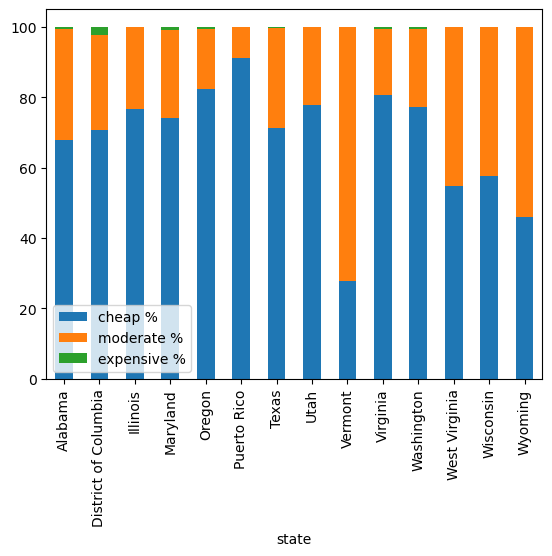

In [16]:
alltoplot.plot(x="state", kind = 'bar', stacked=True, mark_right=True);